# The CodeSearchNet dataset for RAG

To work with the repository context

In [1]:
from datasets import load_dataset
from pprint import pprint
import pandas as pd
import requests
import re
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# ds = load_dataset("code_search_net", 'python', split='test', trust_remote_code=True)
ds = load_dataset("code_x_glue_ct_code_to_text", 'python', split='test', trust_remote_code=True)

In [3]:
df = ds.to_pandas()
df

,id,repo,path,func_name,original_string,language,code,code_tokens,docstring,docstring_tokens,sha,url
0,0,soimort/you-get,src/you_get/extractors/miomio.py,sina_xml_to_url_list,"def sina_xml_to_url_list(xml_data):\n """"""st...",python,"def sina_xml_to_url_list(xml_data):\n """"""st...","[def, sina_xml_to_url_list, (, xml_data, ), :,...",str->list\n Convert XML to URL List.\n F...,"[str, -, >, list, Convert, XML, to, URL, List,...",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...
1,1,soimort/you-get,src/you_get/extractors/dailymotion.py,dailymotion_download,"def dailymotion_download(url, output_dir='.', ...",python,"def dailymotion_download(url, output_dir='.', ...","[def, dailymotion_download, (, url, ,, output_...",Downloads Dailymotion videos by URL.,"[Downloads, Dailymotion, videos, by, URL, .]",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...
2,2,soimort/you-get,src/you_get/extractors/sina.py,sina_download,"def sina_download(url, output_dir='.', merge=T...",python,"def sina_download(url, output_dir='.', merge=T...","[def, sina_download, (, url, ,, output_dir, =,...",Downloads Sina videos by URL.,"[Downloads, Sina, videos, by, URL, .]",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...
3,3,soimort/you-get,src/you_get/util/log.py,sprint,"def sprint(text, *colors):\n """"""Format text...",python,"def sprint(text, *colors):\n """"""Format text...","[def, sprint, (, text, ,, *, colors, ), :, ret...",Format text with color or other effects into A...,"[Format, text, with, color, or, other, effects...",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...
4,4,soimort/you-get,src/you_get/util/log.py,print_log,"def print_log(text, *colors):\n """"""Print a ...",python,"def print_log(text, *colors):\n """"""Print a ...","[def, print_log, (, text, ,, *, colors, ), :, ...",Print a log message to standard error.,"[Print, a, log, message, to, standard, error, .]",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...
...,...,...,...,...,...,...,...,...,...,...,...,...
14913,14913,JIC-CSB/jicbioimage.illustrate,jicbioimage/illustrate/__init__.py,AnnotatedImage.from_grayscale,"def from_grayscale(im, channels_on=(True, True...",python,"def from_grayscale(im, channels_on=(True, True...","[def, from_grayscale, (, im, ,, channels_on, =...",Return a canvas from a grayscale image.\n\n ...,"[Return, a, canvas, from, a, grayscale, image, .]",d88ddf81ee3eb3949677e2ef746af8169ce88092,https://github.com/JIC-CSB/jicbioimage.illustr...
14914,14914,un33k/django-toolware,toolware/utils/generic.py,get_uuid,"def get_uuid(length=32, version=1):\n """"""\n...",python,"def get_uuid(length=32, version=1):\n """"""\n...","[def, get_uuid, (, length, =, 32, ,, version, ...",Returns a unique ID of a given length.\n Us...,"[Returns, a, unique, ID, of, a, given, length,...",973f3e003dc38b812897dab88455bee37dcaf931,https://github.com/un33k/django-toolware/blob/...
14915,14915,un33k/django-toolware,toolware/utils/generic.py,get_unique_key_from_get,"def get_unique_key_from_get(get_dict):\n """"...",python,"def get_unique_key_from_get(get_dict):\n """"...","[def, get_unique_key_from_get, (, get_dict, ),...",Build a unique key from get data,"[Build, a, unique, key, from, get, data]",973f3e003dc38b812897dab88455bee37dcaf931,https://github.com/un33k/django-toolware/blob/...
14916,14916,un33k/django-toolware,toolware/utils/generic.py,get_domain,"def get_domain(url):\n """""" Returns domain n...",python,"def get_domain(url):\n """""" Returns domain n...","[def, get_domain, (, url, ), :, if, 'http', no...",Returns domain name portion of a URL,"[Returns, domain, name, portion, of, a, URL]",973f3e003dc38b812897dab88455bee37dcaf931,https://github.com/un33k/django-toolware/blob/...


In [4]:
# Get all unique repository names
repos = set(df['repo'].unique())
len(repos)

623

In [5]:
top_repos = []

In [54]:
# Get top repositories from github
top_repos = list(top_repos)
for i in range(1, 11):
    try:
        repos_stars = requests.get(f'https://api.github.com/search/repositories?q=language:python&sort=stars&order=desc&per_page=100&page={i}')
        repos_stars = repos_stars.json()['items']
    except:
        print(repos_stars.content)
        continue
    try:
        repos_forks = requests.get(f'https://api.github.com/search/repositories?q=language:python&sort=forks&order=desc&per_page=100&page={i}')
        repos_forks = repos_forks.json()['items']
    except:
        print(repos_forks.content)
        continue
    print(f'page {i}')
    top_repos.extend([repo['full_name'] for repo in repos_stars + repos_forks])

page 1
page 2
page 3
page 4
page 5
page 6
page 7
page 8
page 9
page 10


In [55]:
top_repos = set(top_repos)
len(top_repos)

2185

In [57]:
best_repos = list(top_repos & repos)
best_repos

['Azure/azure-sdk-for-python',
 'apache/airflow',
 'dagster-io/dagster',
 'soimort/you-get',
 'open-mmlab/mmcv',
 'pytorch/vision',
 'streamlink/streamlink']

In [4]:
# Filter df for already chosen repos
df = df[
    df["repo"].isin(
        [
            "Azure/azure-sdk-for-python",
            "apache/airflow",
            "open-mmlab/mmcv",
            "streamlink/streamlink",
        ]
    )
]
df

,id,repo,path,func_name,original_string,language,code,code_tokens,docstring,docstring_tokens,sha,url
25,25,apache/airflow,airflow/executors/base_executor.py,BaseExecutor.has_task,"def has_task(self, task_instance):\n """"...",python,"def has_task(self, task_instance):\n """"...","[def, has_task, (, self, ,, task_instance, ), ...",Checks if a task is either queued or running i...,"[Checks, if, a, task, is, either, queued, or, ...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...
26,26,apache/airflow,airflow/executors/base_executor.py,BaseExecutor.get_event_buffer,"def get_event_buffer(self, dag_ids=None):\n ...",python,"def get_event_buffer(self, dag_ids=None):\n ...","[def, get_event_buffer, (, self, ,, dag_ids, =...",Returns and flush the event buffer. In case da...,"[Returns, and, flush, the, event, buffer, ., I...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...
27,27,apache/airflow,airflow/contrib/hooks/snowflake_hook.py,SnowflakeHook.get_conn,"def get_conn(self):\n """"""\n Retu...",python,"def get_conn(self):\n """"""\n Retu...","[def, get_conn, (, self, ), :, conn_config, =,...",Returns a snowflake.connection object,"[Returns, a, snowflake, ., connection, object]",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...
28,28,apache/airflow,airflow/contrib/hooks/snowflake_hook.py,SnowflakeHook._get_aws_credentials,"def _get_aws_credentials(self):\n """"""\n...",python,"def _get_aws_credentials(self):\n """"""\n...","[def, _get_aws_credentials, (, self, ), :, if,...","returns aws_access_key_id, aws_secret_access_k...","[returns, aws_access_key_id, aws_secret_access...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...
29,29,apache/airflow,airflow/contrib/hooks/grpc_hook.py,GrpcHook._get_field,"def _get_field(self, field_name, default=None)...",python,"def _get_field(self, field_name, default=None)...","[def, _get_field, (, self, ,, field_name, ,, d...","Fetches a field from extras, and returns it. T...","[Fetches, a, field, from, extras, and, returns...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...
...,...,...,...,...,...,...,...,...,...,...,...,...
2350,2350,open-mmlab/mmcv,mmcv/visualization/optflow.py,flow2rgb,"def flow2rgb(flow, color_wheel=None, unknown_t...",python,"def flow2rgb(flow, color_wheel=None, unknown_t...","[def, flow2rgb, (, flow, ,, color_wheel, =, No...",Convert flow map to RGB image.\n\n Args:\n ...,"[Convert, flow, map, to, RGB, image, .]",0d77f61450aab4dde8b8585a577cc496acb95d7f,https://github.com/open-mmlab/mmcv/blob/0d77f6...
2351,2351,open-mmlab/mmcv,mmcv/visualization/optflow.py,make_color_wheel,"def make_color_wheel(bins=None):\n """"""Build...",python,"def make_color_wheel(bins=None):\n """"""Build...","[def, make_color_wheel, (, bins, =, None, ), :...",Build a color wheel.\n\n Args:\n bin...,"[Build, a, color, wheel, .]",0d77f61450aab4dde8b8585a577cc496acb95d7f,https://github.com/open-mmlab/mmcv/blob/0d77f6...
2352,2352,open-mmlab/mmcv,examples/train_cifar10.py,accuracy,"def accuracy(output, target, topk=(1, )):\n ...",python,"def accuracy(output, target, topk=(1, )):\n ...","[def, accuracy, (, output, ,, target, ,, topk,...",Computes the precision@k for the specified val...,"[Computes, the, precision]",0d77f61450aab4dde8b8585a577cc496acb95d7f,https://github.com/open-mmlab/mmcv/blob/0d77f6...
2353,2353,open-mmlab/mmcv,mmcv/parallel/scatter_gather.py,scatter,"def scatter(inputs, target_gpus, dim=0):\n ...",python,"def scatter(inputs, target_gpus, dim=0):\n ...","[def, scatter, (, inputs, ,, target_gpus, ,, d...",Scatter inputs to target gpus.\n\n The only...,"[Scatter, inputs, to, target, gpus, .]",0d77f61450aab4dde8b8585a577cc496acb95d7f,https://github.com/open-mmlab/mmcv/blob/0d77f6...


In [59]:
# Filter df for best_repos
df = df[df['repo'].isin(best_repos)]
df

,id,repo,path,func_name,original_string,language,code,code_tokens,docstring,docstring_tokens,sha,url
0,0,soimort/you-get,src/you_get/extractors/miomio.py,sina_xml_to_url_list,"def sina_xml_to_url_list(xml_data):\n """"""st...",python,"def sina_xml_to_url_list(xml_data):\n """"""st...","[def, sina_xml_to_url_list, (, xml_data, ), :,...",str->list\n Convert XML to URL List.\n F...,"[str, -, >, list, Convert, XML, to, URL, List,...",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...
1,1,soimort/you-get,src/you_get/extractors/dailymotion.py,dailymotion_download,"def dailymotion_download(url, output_dir='.', ...",python,"def dailymotion_download(url, output_dir='.', ...","[def, dailymotion_download, (, url, ,, output_...",Downloads Dailymotion videos by URL.,"[Downloads, Dailymotion, videos, by, URL, .]",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...
2,2,soimort/you-get,src/you_get/extractors/sina.py,sina_download,"def sina_download(url, output_dir='.', merge=T...",python,"def sina_download(url, output_dir='.', merge=T...","[def, sina_download, (, url, ,, output_dir, =,...",Downloads Sina videos by URL.,"[Downloads, Sina, videos, by, URL, .]",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...
3,3,soimort/you-get,src/you_get/util/log.py,sprint,"def sprint(text, *colors):\n """"""Format text...",python,"def sprint(text, *colors):\n """"""Format text...","[def, sprint, (, text, ,, *, colors, ), :, ret...",Format text with color or other effects into A...,"[Format, text, with, color, or, other, effects...",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...
4,4,soimort/you-get,src/you_get/util/log.py,print_log,"def print_log(text, *colors):\n """"""Print a ...",python,"def print_log(text, *colors):\n """"""Print a ...","[def, print_log, (, text, ,, *, colors, ), :, ...",Print a log message to standard error.,"[Print, a, log, message, to, standard, error, .]",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...
...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2985,dagster-io/dagster,python_modules/dagster/dagster/core/execution_...,_execute_core_transform,"def _execute_core_transform(transform_context,...",python,"def _execute_core_transform(transform_context,...","[def, _execute_core_transform, (, transform_co...",Execute the user-specified transform for the s...,"[Execute, the, user, -, specified, transform, ...",4119f8c773089de64831b1dfb9e168e353d401dc,https://github.com/dagster-io/dagster/blob/411...
2986,2986,dagster-io/dagster,python_modules/dagster/dagster/core/types/deco...,as_dagster_type,"def as_dagster_type(\n existing_type,\n ...",python,"def as_dagster_type(\n existing_type,\n ...","[def, as_dagster_type, (, existing_type, ,, na...",Takes a python cls and creates a type for it i...,"[Takes, a, python, cls, and, creates, a, type,...",4119f8c773089de64831b1dfb9e168e353d401dc,https://github.com/dagster-io/dagster/blob/411...
2987,2987,dagster-io/dagster,python_modules/dagster/dagster/core/definition...,resource,"def resource(config_field=None, description=No...",python,"def resource(config_field=None, description=No...","[def, resource, (, config_field, =, None, ,, d...",A decorator for creating a resource. The decor...,"[A, decorator, for, creating, a, resource, ., ...",4119f8c773089de64831b1dfb9e168e353d401dc,https://github.com/dagster-io/dagster/blob/411...
2988,2988,dagster-io/dagster,python_modules/libraries/dagster-pagerduty/dag...,PagerDutyService.EventV2_create,"def EventV2_create(\n self,\n su...",python,"def EventV2_create(\n self,\n su...","[def, EventV2_create, (, self, ,, summary, ,, ...",Events API v2 enables you to add PagerDuty's a...,"[Events, API, v2, enables, you, to, add, Pager...",4119f8c773089de64831b1dfb9e168e353d401dc,https://github.com/dagster-io/dagster/blob/411...


In [60]:
for el in df['docstring'].to_list():
    print(el)
    print('-' * 100)

str->list
    Convert XML to URL List.
    From Biligrab.
----------------------------------------------------------------------------------------------------
Downloads Dailymotion videos by URL.
----------------------------------------------------------------------------------------------------
Downloads Sina videos by URL.
----------------------------------------------------------------------------------------------------
Format text with color or other effects into ANSI escaped string.
----------------------------------------------------------------------------------------------------
Print a log message to standard error.
----------------------------------------------------------------------------------------------------
Print an error log message.
----------------------------------------------------------------------------------------------------
What a Terrible Failure!
----------------------------------------------------------------------------------------------------
Detect ope

In [ ]:
# To remove from documentation string
# Args, :return, :param, LINKS, >>>, :type, :rtype, Parameters, * , The return type is
# Swap \s+ with ' '
# Then, remove empty strings

In [5]:
def extract_summary(docstring):
    patterns_to_remove = [
        r':param.*$',  # Remove parameter descriptions
        r':return.*$',  # Remove return value descriptions
        r':type.*$',   # Remove type descriptions
        r':rtype.*$',  # Remove return type descriptions
        r'Args:.*$',  # Remove "Args:" section
        r'Parameters.*$',  # Remove "Parameters:" section
        r'>>>.*$',  # Remove Python console examples
        r'\* .*$',  # Remove bullet points
        r'The return type is.*$',  # Remove return type statements
        r'https?://.*$',  # Remove URLs
        r':?Examples?.*$',  # Remove "Example" section
        r'Returns.*$',  # Remove "Returns" section
        r'\.\.\.?.*$',  # Remove ellipses
        r'NOTE.*',  # Remove "NOTE" section
        r'See Also.*$',  # Remove "See Also" section
        r'Links.*$',  # Remove "Links" section
        r'Raises.*$',  # Remove "Raises" section
        r'\s\w+:.*$',  # Remove any word before : and after
    ]
    # Combine the patterns into a single regular expression
    pattern = re.compile(r'({})'.format('|'.join(patterns_to_remove)), re.MULTILINE | re.DOTALL)
    # Remove the patterns from the docstring
    summary = pattern.sub('', docstring).strip()
    summary = re.sub('\s+', ' ', summary)
    return summary

In [6]:
tqdm.pandas()
df['method_summary'] = df['docstring'].progress_apply(extract_summary)

100%|██████████| 987/987 [00:00<00:00, 28692.87it/s]
/tmp/ipykernel_961993/108663722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['method_summary'] = df['docstring'].progress_apply(extract_summary)


In [63]:
for el in df['method_summary'].to_list():
    print(el)
    print('-' * 100)

str->list Convert XML to URL List. From Biligrab.
----------------------------------------------------------------------------------------------------
Downloads Dailymotion videos by URL.
----------------------------------------------------------------------------------------------------
Downloads Sina videos by URL.
----------------------------------------------------------------------------------------------------
Format text with color or other effects into ANSI escaped string.
----------------------------------------------------------------------------------------------------
Print a log message to standard error.
----------------------------------------------------------------------------------------------------
Print an error log message.
----------------------------------------------------------------------------------------------------
What a Terrible Failure!
----------------------------------------------------------------------------------------------------
Detect operating s

In [7]:
filtered_df = df[(10 < df['method_summary'].str.len()) & (df['method_summary'].str.len() < 200)]
filtered_df

,id,repo,path,func_name,original_string,language,code,code_tokens,docstring,docstring_tokens,sha,url,method_summary
25,25,apache/airflow,airflow/executors/base_executor.py,BaseExecutor.has_task,"def has_task(self, task_instance):\n """"...",python,"def has_task(self, task_instance):\n """"...","[def, has_task, (, self, ,, task_instance, ), ...",Checks if a task is either queued or running i...,"[Checks, if, a, task, is, either, queued, or, ...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Checks if a task is either queued or running i...
28,28,apache/airflow,airflow/contrib/hooks/snowflake_hook.py,SnowflakeHook._get_aws_credentials,"def _get_aws_credentials(self):\n """"""\n...",python,"def _get_aws_credentials(self):\n """"""\n...","[def, _get_aws_credentials, (, self, ), :, if,...","returns aws_access_key_id, aws_secret_access_k...","[returns, aws_access_key_id, aws_secret_access...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,"returns aws_access_key_id, aws_secret_access_k..."
30,30,apache/airflow,airflow/hooks/postgres_hook.py,PostgresHook.copy_expert,"def copy_expert(self, sql, filename, open=open...",python,"def copy_expert(self, sql, filename, open=open...","[def, copy_expert, (, self, ,, sql, ,, filenam...",Executes SQL using psycopg2 copy_expert method...,"[Executes, SQL, using, psycopg2, copy_expert, ...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Executes SQL using psycopg2 copy_expert method...
31,31,apache/airflow,airflow/hooks/postgres_hook.py,PostgresHook.bulk_dump,"def bulk_dump(self, table, tmp_file):\n ...",python,"def bulk_dump(self, table, tmp_file):\n ...","[def, bulk_dump, (, self, ,, table, ,, tmp_fil...",Dumps a database table into a tab-delimited file,"[Dumps, a, database, table, into, a, tab, -, d...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Dumps a database table into a tab-delimited file
32,32,apache/airflow,airflow/contrib/operators/file_to_gcs.py,FileToGoogleCloudStorageOperator.execute,"def execute(self, context):\n """"""\n ...",python,"def execute(self, context):\n """"""\n ...","[def, execute, (, self, ,, context, ), :, hook...",Uploads the file to Google cloud storage,"[Uploads, the, file, to, Google, cloud, storage]",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Uploads the file to Google cloud storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,2350,open-mmlab/mmcv,mmcv/visualization/optflow.py,flow2rgb,"def flow2rgb(flow, color_wheel=None, unknown_t...",python,"def flow2rgb(flow, color_wheel=None, unknown_t...","[def, flow2rgb, (, flow, ,, color_wheel, =, No...",Convert flow map to RGB image.\n\n Args:\n ...,"[Convert, flow, map, to, RGB, image, .]",0d77f61450aab4dde8b8585a577cc496acb95d7f,https://github.com/open-mmlab/mmcv/blob/0d77f6...,Convert flow map to RGB image.
2351,2351,open-mmlab/mmcv,mmcv/visualization/optflow.py,make_color_wheel,"def make_color_wheel(bins=None):\n """"""Build...",python,"def make_color_wheel(bins=None):\n """"""Build...","[def, make_color_wheel, (, bins, =, None, ), :...",Build a color wheel.\n\n Args:\n bin...,"[Build, a, color, wheel, .]",0d77f61450aab4dde8b8585a577cc496acb95d7f,https://github.com/open-mmlab/mmcv/blob/0d77f6...,Build a color wheel.
2352,2352,open-mmlab/mmcv,examples/train_cifar10.py,accuracy,"def accuracy(output, target, topk=(1, )):\n ...",python,"def accuracy(output, target, topk=(1, )):\n ...","[def, accuracy, (, output, ,, target, ,, topk,...",Computes the precision@k for the specified val...,"[Computes, the, precision]",0d77f61450aab4dde8b8585a577cc496acb95d7f,https://github.com/open-mmlab/mmcv/blob/0d77f6...,Computes the precision@k for the specified val...
2353,2353,open-mmlab/mmcv,mmcv/parallel/scatter_gather.py,scatter,"def scatter(inputs, target_gpus, dim=0):\n ...",python,"def scatte

In [8]:
# Group by repository_name and count values
grouped_df = filtered_df.groupby('repo')['method_summary'].count().reset_index(name='count')
# Select those where count > 50
grouped_df = grouped_df[grouped_df['count'] > 50]
grouped_df

,repo,count
0,Azure/azure-sdk-for-python,247
1,apache/airflow,465
2,open-mmlab/mmcv,60
3,streamlink/streamlink,74


In [9]:
selected_df = filtered_df[filtered_df['repo'].isin(grouped_df['repo'])]
selected_df

,id,repo,path,func_name,original_string,language,code,code_tokens,docstring,docstring_tokens,sha,url,method_summary
25,25,apache/airflow,airflow/executors/base_executor.py,BaseExecutor.has_task,"def has_task(self, task_instance):\n """"...",python,"def has_task(self, task_instance):\n """"...","[def, has_task, (, self, ,, task_instance, ), ...",Checks if a task is either queued or running i...,"[Checks, if, a, task, is, either, queued, or, ...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Checks if a task is either queued or running i...
28,28,apache/airflow,airflow/contrib/hooks/snowflake_hook.py,SnowflakeHook._get_aws_credentials,"def _get_aws_credentials(self):\n """"""\n...",python,"def _get_aws_credentials(self):\n """"""\n...","[def, _get_aws_credentials, (, self, ), :, if,...","returns aws_access_key_id, aws_secret_access_k...","[returns, aws_access_key_id, aws_secret_access...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,"returns aws_access_key_id, aws_secret_access_k..."
30,30,apache/airflow,airflow/hooks/postgres_hook.py,PostgresHook.copy_expert,"def copy_expert(self, sql, filename, open=open...",python,"def copy_expert(self, sql, filename, open=open...","[def, copy_expert, (, self, ,, sql, ,, filenam...",Executes SQL using psycopg2 copy_expert method...,"[Executes, SQL, using, psycopg2, copy_expert, ...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Executes SQL using psycopg2 copy_expert method...
31,31,apache/airflow,airflow/hooks/postgres_hook.py,PostgresHook.bulk_dump,"def bulk_dump(self, table, tmp_file):\n ...",python,"def bulk_dump(self, table, tmp_file):\n ...","[def, bulk_dump, (, self, ,, table, ,, tmp_fil...",Dumps a database table into a tab-delimited file,"[Dumps, a, database, table, into, a, tab, -, d...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Dumps a database table into a tab-delimited file
32,32,apache/airflow,airflow/contrib/operators/file_to_gcs.py,FileToGoogleCloudStorageOperator.execute,"def execute(self, context):\n """"""\n ...",python,"def execute(self, context):\n """"""\n ...","[def, execute, (, self, ,, context, ), :, hook...",Uploads the file to Google cloud storage,"[Uploads, the, file, to, Google, cloud, storage]",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Uploads the file to Google cloud storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,2350,open-mmlab/mmcv,mmcv/visualization/optflow.py,flow2rgb,"def flow2rgb(flow, color_wheel=None, unknown_t...",python,"def flow2rgb(flow, color_wheel=None, unknown_t...","[def, flow2rgb, (, flow, ,, color_wheel, =, No...",Convert flow map to RGB image.\n\n Args:\n ...,"[Convert, flow, map, to, RGB, image, .]",0d77f61450aab4dde8b8585a577cc496acb95d7f,https://github.com/open-mmlab/mmcv/blob/0d77f6...,Convert flow map to RGB image.
2351,2351,open-mmlab/mmcv,mmcv/visualization/optflow.py,make_color_wheel,"def make_color_wheel(bins=None):\n """"""Build...",python,"def make_color_wheel(bins=None):\n """"""Build...","[def, make_color_wheel, (, bins, =, None, ), :...",Build a color wheel.\n\n Args:\n bin...,"[Build, a, color, wheel, .]",0d77f61450aab4dde8b8585a577cc496acb95d7f,https://github.com/open-mmlab/mmcv/blob/0d77f6...,Build a color wheel.
2352,2352,open-mmlab/mmcv,examples/train_cifar10.py,accuracy,"def accuracy(output, target, topk=(1, )):\n ...",python,"def accuracy(output, target, topk=(1, )):\n ...","[def, accuracy, (, output, ,, target, ,, topk,...",Computes the precision@k for the specified val...,"[Computes, the, precision]",0d77f61450aab4dde8b8585a577cc496acb95d7f,https://github.com/open-mmlab/mmcv/blob/0d77f6...,Computes the precision@k for the specified val...
2353,2353,open-mmlab/mmcv,mmcv/parallel/scatter_gather.py,scatter,"def scatter(inputs, target_gpus, dim=0):\n ...",python,"def scatte

In [10]:
# Remove docstrings from code
def remove_docstrings(code):
    docstrings = re.findall(r"'''(.*?)'''", code, re.DOTALL) + re.findall(r'"""(.*?)"""', code, re.DOTALL)
    for docstring in docstrings:
        code = code.replace(docstring, '')
    code = re.sub(r'""""""\s*', '', code, re.DOTALL)
    code = re.sub(r"''''''\s*", '', code, re.DOTALL)
    return code

selected_df['method_code'] = selected_df['code'].apply(remove_docstrings)
selected_df

,id,repo,path,func_name,original_string,language,code,code_tokens,docstring,docstring_tokens,sha,url,method_summary,method_code
25,25,apache/airflow,airflow/executors/base_executor.py,BaseExecutor.has_task,"def has_task(self, task_instance):\n """"...",python,"def has_task(self, task_instance):\n """"...","[def, has_task, (, self, ,, task_instance, ), ...",Checks if a task is either queued or running i...,"[Checks, if, a, task, is, either, queued, or, ...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Checks if a task is either queued or running i...,"def has_task(self, task_instance):\n if..."
28,28,apache/airflow,airflow/contrib/hooks/snowflake_hook.py,SnowflakeHook._get_aws_credentials,"def _get_aws_credentials(self):\n """"""\n...",python,"def _get_aws_credentials(self):\n """"""\n...","[def, _get_aws_credentials, (, self, ), :, if,...","returns aws_access_key_id, aws_secret_access_k...","[returns, aws_access_key_id, aws_secret_access...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,"returns aws_access_key_id, aws_secret_access_k...",def _get_aws_credentials(self):\n if se...
30,30,apache/airflow,airflow/hooks/postgres_hook.py,PostgresHook.copy_expert,"def copy_expert(self, sql, filename, open=open...",python,"def copy_expert(self, sql, filename, open=open...","[def, copy_expert, (, self, ,, sql, ,, filenam...",Executes SQL using psycopg2 copy_expert method...,"[Executes, SQL, using, psycopg2, copy_expert, ...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Executes SQL using psycopg2 copy_expert method...,"def copy_expert(self, sql, filename, open=open..."
31,31,apache/airflow,airflow/hooks/postgres_hook.py,PostgresHook.bulk_dump,"def bulk_dump(self, table, tmp_file):\n ...",python,"def bulk_dump(self, table, tmp_file):\n ...","[def, bulk_dump, (, self, ,, table, ,, tmp_fil...",Dumps a database table into a tab-delimited file,"[Dumps, a, database, table, into, a, tab, -, d...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Dumps a database table into a tab-delimited file,"def bulk_dump(self, table, tmp_file):\n ..."
32,32,apache/airflow,airflow/contrib/operators/file_to_gcs.py,FileToGoogleCloudStorageOperator.execute,"def execute(self, context):\n """"""\n ...",python,"def execute(self, context):\n """"""\n ...","[def, execute, (, self, ,, context, ), :, hook...",Uploads the file to Google cloud storage,"[Uploads, the, file, to, Google, cloud, storage]",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Uploads the file to Google cloud storage,"def execute(self, context):\n hook = Go..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,2350,open-mmlab/mmcv,mmcv/visualization/optflow.py,flow2rgb,"def flow2rgb(flow, color_wheel=None, unknown_t...",python,"def flow2rgb(flow, color_wheel=None, unknown_t...","[def, flow2rgb, (, flow, ,, color_wheel, =, No...",Convert flow map to RGB image.\n\n Args:\n ...,"[Convert, flow, map, to, RGB, image, .]",0d77f61450aab4dde8b8585a577cc496acb95d7f,https://github.com/open-mmlab/mmcv/blob/0d77f6...,Convert flow map to RGB image.,"def flow2rgb(flow, color_wheel=None, unknown_t..."
2351,2351,open-mmlab/mmcv,mmcv/visualization/optflow.py,make_color_wheel,"def make_color_wheel(bins=None):\n """"""Build...",python,"def make_color_wheel(bins=None):\n """"""Build...","[def, make_color_wheel, (, bins, =, None, ), :...",Build a color wheel.\n\n Args:\n bin...,"[Build, a, color, wheel, .]",0d77f61450aab4dde8b8585a577cc496acb95d7f,https://github.com/open-mmlab/mmcv/blob/0d77f6...,Build a color wheel.,def make_color_wheel(bins=None):\n if bins ...
2352,2352,open-mmlab/mmcv,examples/train_cifar10.py,accuracy,"def accuracy(output, target, topk=(1, )):\n ...",python,"def accuracy(output, target, topk=(1, )):\n ...","[def, accuracy, (, output, ,, target, ,, topk,...",Compute

In [11]:
# Remove comments from code
def remove_comments(code):
    pattern = r"(\".*?\"|\'.*?\')|(#[^\r\n]*$)"
    # first group captures quoted strings (double or single)
    # second group captures comments (starting with '#')
    regex = re.compile(pattern, re.MULTILINE|re.DOTALL)
    def _replacer(match):
        # if the 2nd group (capturing comments) is not None,
        # it means we have captured a non-quoted (real) comment string.
        if match.group(2) is not None:
            return "" # so we will return empty to remove the comment
        else: # otherwise, we will return the 1st group
            return match.group(1) # captured quoted-string
    return regex.sub(_replacer, code)

selected_df['method_code'] = selected_df['method_code'].apply(remove_comments)
selected_df

,id,repo,path,func_name,original_string,language,code,code_tokens,docstring,docstring_tokens,sha,url,method_summary,method_code
25,25,apache/airflow,airflow/executors/base_executor.py,BaseExecutor.has_task,"def has_task(self, task_instance):\n """"...",python,"def has_task(self, task_instance):\n """"...","[def, has_task, (, self, ,, task_instance, ), ...",Checks if a task is either queued or running i...,"[Checks, if, a, task, is, either, queued, or, ...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Checks if a task is either queued or running i...,"def has_task(self, task_instance):\n if..."
28,28,apache/airflow,airflow/contrib/hooks/snowflake_hook.py,SnowflakeHook._get_aws_credentials,"def _get_aws_credentials(self):\n """"""\n...",python,"def _get_aws_credentials(self):\n """"""\n...","[def, _get_aws_credentials, (, self, ), :, if,...","returns aws_access_key_id, aws_secret_access_k...","[returns, aws_access_key_id, aws_secret_access...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,"returns aws_access_key_id, aws_secret_access_k...",def _get_aws_credentials(self):\n if se...
30,30,apache/airflow,airflow/hooks/postgres_hook.py,PostgresHook.copy_expert,"def copy_expert(self, sql, filename, open=open...",python,"def copy_expert(self, sql, filename, open=open...","[def, copy_expert, (, self, ,, sql, ,, filenam...",Executes SQL using psycopg2 copy_expert method...,"[Executes, SQL, using, psycopg2, copy_expert, ...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Executes SQL using psycopg2 copy_expert method...,"def copy_expert(self, sql, filename, open=open..."
31,31,apache/airflow,airflow/hooks/postgres_hook.py,PostgresHook.bulk_dump,"def bulk_dump(self, table, tmp_file):\n ...",python,"def bulk_dump(self, table, tmp_file):\n ...","[def, bulk_dump, (, self, ,, table, ,, tmp_fil...",Dumps a database table into a tab-delimited file,"[Dumps, a, database, table, into, a, tab, -, d...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Dumps a database table into a tab-delimited file,"def bulk_dump(self, table, tmp_file):\n ..."
32,32,apache/airflow,airflow/contrib/operators/file_to_gcs.py,FileToGoogleCloudStorageOperator.execute,"def execute(self, context):\n """"""\n ...",python,"def execute(self, context):\n """"""\n ...","[def, execute, (, self, ,, context, ), :, hook...",Uploads the file to Google cloud storage,"[Uploads, the, file, to, Google, cloud, storage]",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,Uploads the file to Google cloud storage,"def execute(self, context):\n hook = Go..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,2350,open-mmlab/mmcv,mmcv/visualization/optflow.py,flow2rgb,"def flow2rgb(flow, color_wheel=None, unknown_t...",python,"def flow2rgb(flow, color_wheel=None, unknown_t...","[def, flow2rgb, (, flow, ,, color_wheel, =, No...",Convert flow map to RGB image.\n\n Args:\n ...,"[Convert, flow, map, to, RGB, image, .]",0d77f61450aab4dde8b8585a577cc496acb95d7f,https://github.com/open-mmlab/mmcv/blob/0d77f6...,Convert flow map to RGB image.,"def flow2rgb(flow, color_wheel=None, unknown_t..."
2351,2351,open-mmlab/mmcv,mmcv/visualization/optflow.py,make_color_wheel,"def make_color_wheel(bins=None):\n """"""Build...",python,"def make_color_wheel(bins=None):\n """"""Build...","[def, make_color_wheel, (, bins, =, None, ), :...",Build a color wheel.\n\n Args:\n bin...,"[Build, a, color, wheel, .]",0d77f61450aab4dde8b8585a577cc496acb95d7f,https://github.com/open-mmlab/mmcv/blob/0d77f6...,Build a color wheel.,def make_color_wheel(bins=None):\n if bins ...
2352,2352,open-mmlab/mmcv,examples/train_cifar10.py,accuracy,"def accuracy(output, target, topk=(1, )):\n ...",python,"def accuracy(output, target, topk=(1, )):\n ...","[def, accuracy, (, output, ,, target, ,, topk,...",Compute

In [12]:
# Select columns and rename
final_df = selected_df[['repo', 'func_name', 'method_code', 'method_summary', 'original_string', 'path']]
final_df = final_df.rename(columns={'repo': 'repo_name', 'func_name': 'method_name', 'original_string': 'original_method_code', 'path': 'method_path'}).reset_index(drop=True)
final_df

,repo_name,method_name,method_code,method_summary,original_method_code,method_path
0,apache/airflow,BaseExecutor.has_task,"def has_task(self, task_instance):\n if...",Checks if a task is either queued or running i...,"def has_task(self, task_instance):\n """"...",airflow/executors/base_executor.py
1,apache/airflow,SnowflakeHook._get_aws_credentials,def _get_aws_credentials(self):\n if se...,"returns aws_access_key_id, aws_secret_access_k...","def _get_aws_credentials(self):\n """"""\n...",airflow/contrib/hooks/snowflake_hook.py
2,apache/airflow,PostgresHook.copy_expert,"def copy_expert(self, sql, filename, open=open...",Executes SQL using psycopg2 copy_expert method...,"def copy_expert(self, sql, filename, open=open...",airflow/hooks/postgres_hook.py
3,apache/airflow,PostgresHook.bulk_dump,"def bulk_dump(self, table, tmp_file):\n ...",Dumps a database table into a tab-delimited file,"def bulk_dump(self, table, tmp_file):\n ...",airflow/hooks/postgres_hook.py
4,apache/airflow,FileToGoogleCloudStorageOperator.execute,"def execute(self, context):\n hook = Go...",Uploads the file to Google cloud storage,"def execute(self, context):\n """"""\n ...",airflow/contrib/operators/file_to_gcs.py
...,...,...,...,...,...,...
841,open-mmlab/mmcv,flow2rgb,"def flow2rgb(flow, color_wheel=None, unknown_t...",Convert flow map to RGB image.,"def flow2rgb(flow, color_wheel=None, unknown_t...",mmcv/visualization/optflow.py
842,open-mmlab/mmcv,make_color_wheel,def make_color_wheel(bins=None):\n if bins ...,Build a color wheel.,"def make_color_wheel(bins=None):\n """"""Build...",mmcv/visualization/optflow.py
843,open-mmlab/mmcv,accuracy,"def accuracy(output, target, topk=(1, )):\n ...",Computes the precision@k for the specified val...,"def accuracy(output, target, topk=(1, )):\n ...",examples/train_cifar10.py
844,open-mmlab/mmcv,scatter,"def scatter(inputs, target_gpus, dim=0):\n ...",Scatter inputs to target gpus. The only differ...,"def scatter(inputs, target_gpus, dim=0):\n ...",mmcv/parallel/scatter_gather.py


In [13]:
# Select 10 for each repository and remove the from final_df
fewshot_df = final_df.groupby('repo_name').head(10).reset_index(drop=True)

eval_df = final_df[~final_df.index.isin(fewshot_df.index)]
len(fewshot_df), len(eval_df)

(40, 806)

In [14]:
fewshot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   repo_name             40 non-null     object
 1   method_name           40 non-null     object
 2   method_code           40 non-null     object
 3   method_summary        40 non-null     object
 4   original_method_code  40 non-null     object
 5   method_path           40 non-null     object
dtypes: object(6)
memory usage: 2.0+ KB


In [15]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 806 entries, 40 to 845
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   repo_name             806 non-null    object
 1   method_name           806 non-null    object
 2   method_code           806 non-null    object
 3   method_summary        806 non-null    object
 4   original_method_code  806 non-null    object
 5   method_path           806 non-null    object
dtypes: object(6)
memory usage: 44.1+ KB


In [13]:
# Save to jsonl
DATA_DIR = Path('../../data/preprocessed')

# final_df.to_json(DATA_DIR / 'method-level-mcsn-full.jsonl', orient='records', lines=True)
eval_df.to_json(DATA_DIR / 'method-level-mcsn.jsonl', orient='records', lines=True)
fewshot_df.to_json(DATA_DIR / 'method-level-mcsn-few-shot.jsonl', orient='records', lines=True)

## EDA

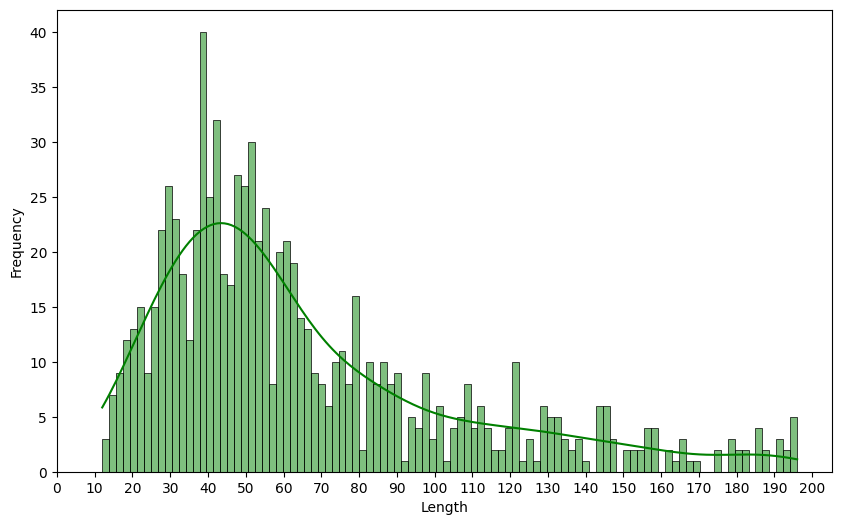

In [101]:
tdf = final_df.copy()
tdf['method_summary_length'] = tdf['method_summary'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(data=tdf, x='method_summary_length', bins=100, kde=True, color='green')
plt.xlabel('Length')
plt.xticks(np.arange(0, 210, 10))
plt.ylabel('Frequency')
plt.show()